<a href="https://colab.research.google.com/github/juancuevas-ops/analisis-molecular-covid19/blob/main/Copia_de_aminoacidos_sarscorv21_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Bio

     |████████████████████████████████| 81kB 3.7MB/s 
     |████████████████████████████████| 2.3MB 6.5MB/s 


In [ ]:
# Load Pkgs
from Bio.Seq import Seq
from Bio import SeqIO

In [ ]:
covid = SeqIO.read("/content/sequence (6).fasta","fasta")

In [ ]:
covid

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='NC_045512.2', name='NC_045512.2', description='NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

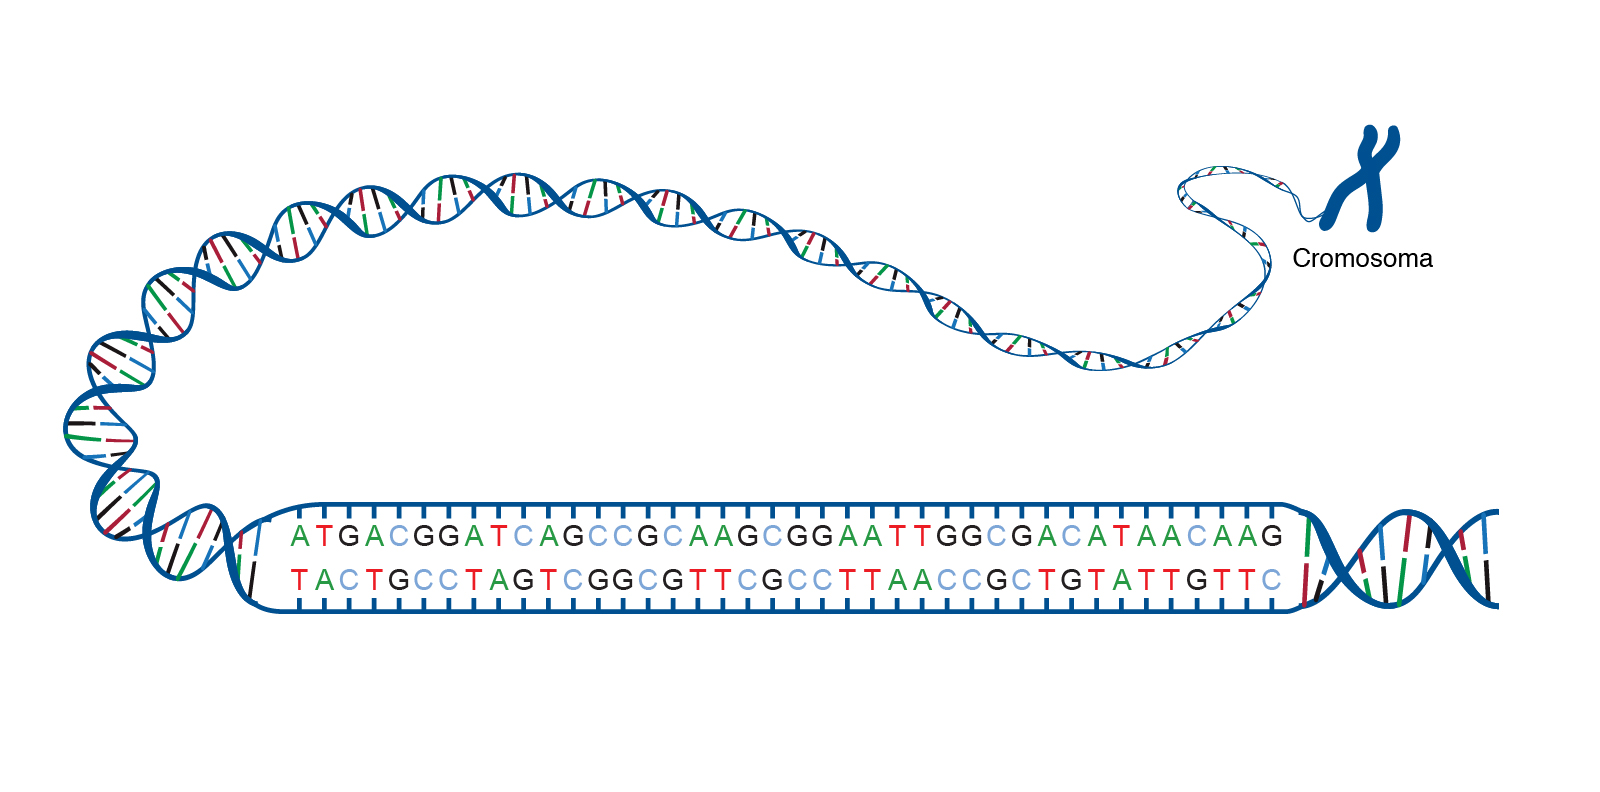

In [ ]:
from PIL import Image
img2 = Image.open("/content/acgt.jpg")
img2

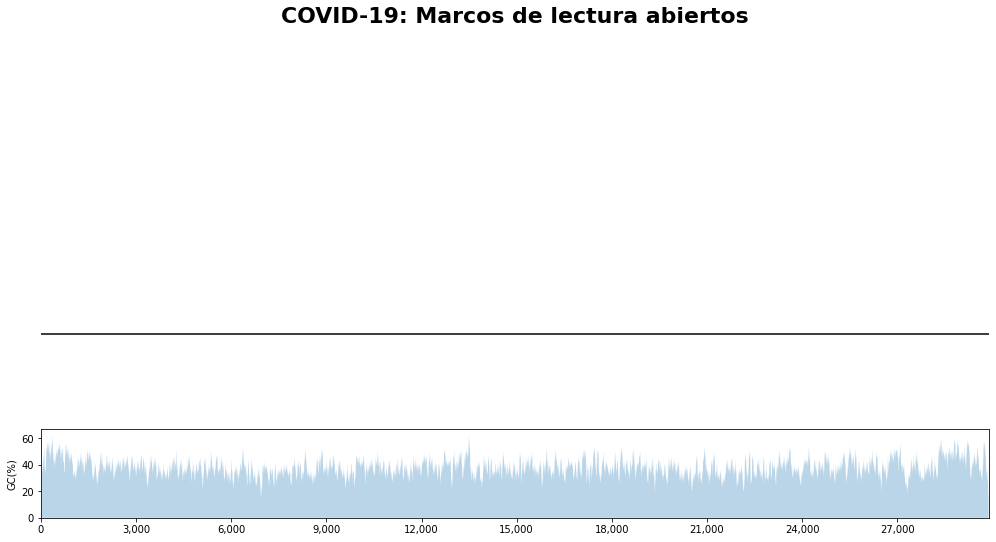

In [ ]:
#Install DNA_features_viewer for visuazation and bcbio-gff for parsing
!pip install bcbio-gff
!pip install dna_features_viewer

#Import libraries
import matplotlib.pyplot as plt
from dna_features_viewer import BiopythonTranslator
from Bio import SeqIO
import numpy as np

fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(17, 9), sharex=True, gridspec_kw={"height_ratios": [4, 1]}
)
ax1.set_title('COVID-19: Marcos de lectura abiertos', size=22, weight='bold')

# PLOT THE RECORD MAP
record = SeqIO.read("/content/sequence (6).fasta", "fasta")
graphic_record = BiopythonTranslator().translate_record(record)
graphic_record.plot(ax=ax1, with_ruler=False, strand_in_label_threshold=4)

# TRAZAR EL CONTENIDO DE GC LOCAL (utilizamos ventanas de 50 pb)
gc = lambda s: 100.0 * len([c for c in s if c in "GC"]) / 50
xx = np.arange(len(record.seq) - 50)
yy = [gc(record.seq[x : x + 50]) for x in xx]
ax2.fill_between(xx + 25, yy, alpha=0.3)
ax2.set_ylim(bottom=0)
ax2.set_ylabel("GC(%)")
plt.show()

La transcripción es el primer paso en la expresión genética. Implica copiar la secuencia de ADN de un gen para hacer una molécula de ARN.

Básicamente, el ARNm es una copia de nuestro ADN. Sin embargo, en el ARN, una base llamada uracilo (U) reemplaza a la timina (T) como nucleótido complementario de la adenina (esa es la única diferencia, T se reemplaza por U).
Podemos transcribir nuestra secuencia de ADN con Biopython de transcribir () la función

TRANSCRIPCION

In [ ]:
from PIL import Image

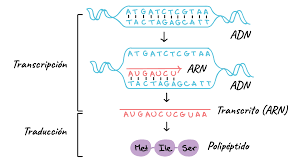

In [ ]:
img3 = Image.open("/content/descarga.png")
img3

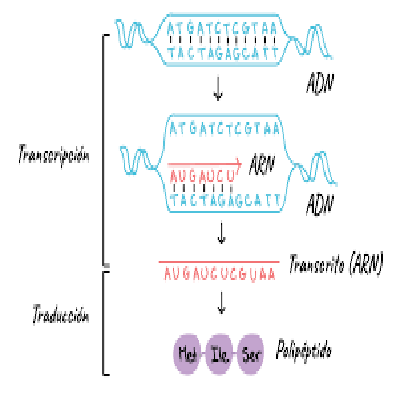

In [ ]:


from PIL import Image
img5 = Image.open('/content/descarga.png')
new_img = img5.resize((400,400))
new_img.save('1-400x400.png','png')
new_img


In [ ]:
covid_DNA= covid.seq

In [ ]:
covid_mRNA = covid_DNA.transcribe()

In [ ]:
covid_mRNA

Seq('AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGU...AAA')

In [ ]:
print(covid_mRNA[:100])

AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUC


In [ ]:
import pandas as pd

DNA= covid_mRNA
nucleotides={}
for n in DNA:
    if n in nucleotides:
        nucleotides[n] += 1
    else:
        nucleotides[n] =  1
print(nucleotides)



{'I': 436, 'K': 413, 'G': 394, 'L': 886, 'Y': 505, 'P': 292, 'R': 558, '*': 774, 'Q': 325, 'T': 679, 'N': 472, 'S': 810, 'C': 635, 'V': 548, 'F': 593, 'A': 375, 'H': 332, 'D': 290, 'E': 270, 'W': 263, 'M': 117}


In [ ]:
#crando un dataframe molecular
nts= pd.DataFrame(data=nucleotides, index=[0]).T.reset_index()
nts= nts.rename(columns={0: 'frequency', 'index': 'nucleotides'})
nts=nts.sort_values(by=['frequency'], ascending=True)
nts

,nucleotides,frequency
20,M,117
19,W,263
18,E,270
17,D,290
5,P,292
8,Q,325
16,H,332
15,A,375
2,G,394
1,K,413


In [ ]:
#Traducir la secuencia de ARNm a una cadena de aminoácidos
covid_aminoacidos_cadena = covid_DNA.translate()


/usr/local/lib/python3.7/dist-packages/Bio/Seq.py:2338: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [ ]:
print(covid_aminoacidos_cadena [:678])

IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS*RWHLWLSRS*KRRFAST*TALCVHQTFGCSNCTSWSCYG*AGSRTRRHSVRS*W*DTWCPCPSCGRNTSGLPQGSSS*ER**RSWWP*LRRRSKVI*LRRRAWH*SL*RFSRKLEH*T*QWCYP*THA*A*RRGIHSLCR*QLLWP*WLPS*VH*RPSSTCW*SFMHFVRTTGLY*H*EGCILLP*T*A*NCLVHGTF*KEL*IADTF*N*IGKEI*HLQWGMSKFCISLKFHNQDYSTKG*KEKA*WLYG*NSICLSSCVTK*MQPNVPFNSHEV*SLW*NFMADGRFC*SHLRILWH*EFD*RRCHYLWLLTPKCCC*NLLSSMSQFRSRT*A*SCRIP**IWLENHSS*GWSHYCLWRLCVLLCWLP*QVCLLGSTC*R*HRL*PYRCCWRRFRRS**QPS*NTPKRESQHQYCW*L*T**RDRHYFGIFFCFHKCFCGNCERFGL*SIQTNC*ILW*F*SYKRKS*KRCLEYW*TEINTESSLCICIRGCSCCTINFLPHS*NCSKFCACFTEGRYNNTRWNFTVFTETH*CYDVHI*F


In [ ]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [ ]:
covid_arn

SeqRecord(seq=Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK'), id='<unknown id>', name='<unknown name>', description='<unknown description>', dbxrefs=[])

In [ ]:
covid_aminoacidos_cadena2 = ProteinAnalysis(str(covid_aminoacidos_cadena ))

In [ ]:
covid_aminoacidos_cadena2

In [ ]:
covid_aminoacidos_cadena2.count_amino_acids()

{'A': 375,
 'C': 635,
 'D': 290,
 'E': 270,
 'F': 593,
 'G': 394,
 'H': 332,
 'I': 436,
 'K': 413,
 'L': 886,
 'M': 117,
 'N': 472,
 'P': 292,
 'Q': 325,
 'R': 558,
 'S': 810,
 'T': 679,
 'V': 548,
 'W': 263,
 'Y': 505}

Metabolismo de la homocisteína
La homocisteína no se incorpora a través de la dieta en los vertebrados, sino que aparece como derivada del metabolismo de la metionina, otro aminoácido, que forma parte de las proteínas. La metionina, procedente de la dieta o de la degradación de las proteínas propias del organismo, es transformada dentro de las células a homocisteína mediante tres reacciones sucesivas. Esta es la única fuente de homocisteína en vertebrados. A nivel de la homocisteína, el metabolismo se bifurca en dos rutas metabólicas, llamadas de la transulfuración y de la remetilación.

EXCESO DE HOMOCISTEINA

Se denomina hiperhomocisteinemia a un grupo de enfermedades metabólicas poco frecuentes que se caracterizan por presentar un nivel elevado del aminoácido homocisteína en el plasma sanguíneo.

Los niveles de homocisteína elevados en sangre guardan una estrecha relación con aterosclerosis prematura, trombosis recurrentes de arterias coronarias, cerebrales o periféricas, trombosis venosa y recientemente descubierto, con el riesgo de desarrollar mal de Alzheimer. Estudios científicos recientes han mostrado que incluso los niveles moderadamente elevados de homocisteína aumentan el riesgo de enfermedad de las arterias coronarias, cerebrales, periféricas y de la muerte cerebrovascular.1​

Debido a que los folatos (derivados del ácido fólico) participan en la degradación metabólica de la homocisteína, los niveles plasmáticos de este aminoácido muestran una fuerte correlación inversa con la ingestión dietética y con los niveles en plasma de folatos.

NOTA:sars_corv2 contiene histidina procursor de la histamina la que al estar alterada produce dearrea

In [ ]:
from collections import Counter
Counter(covid_aminoacidos_cadena).most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

 Leucina("L")
Es uno de los 3 aminoácidos de cadena ramificada (BCAA) junto a la isoleucina y valina, que están implicados en la síntesis proteica. Es un potente estimulador de la insulina, es necesario para la cicatrización de las heridas y la curación de huesos. Modula la liberación de encefalinas, que son analgésicos naturales.

In [ ]:
from PIL import Image

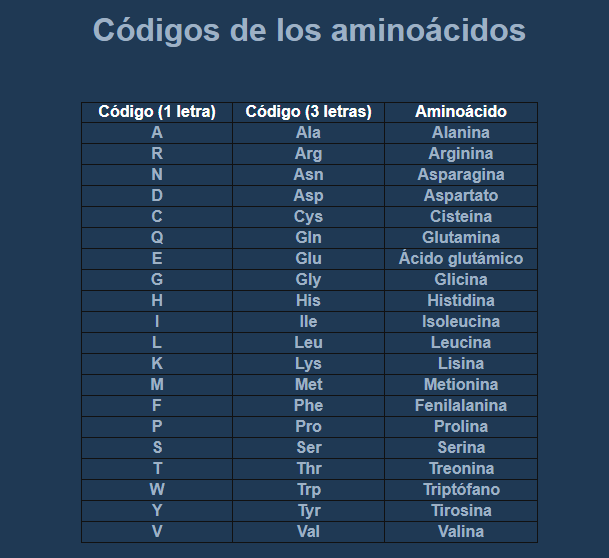

In [ ]:
img7= Image.open("/content/codigo_amcds.png")
img7

In [ ]:
img = Image.open("/content/tabla-aminoacidos-wide.jpg")

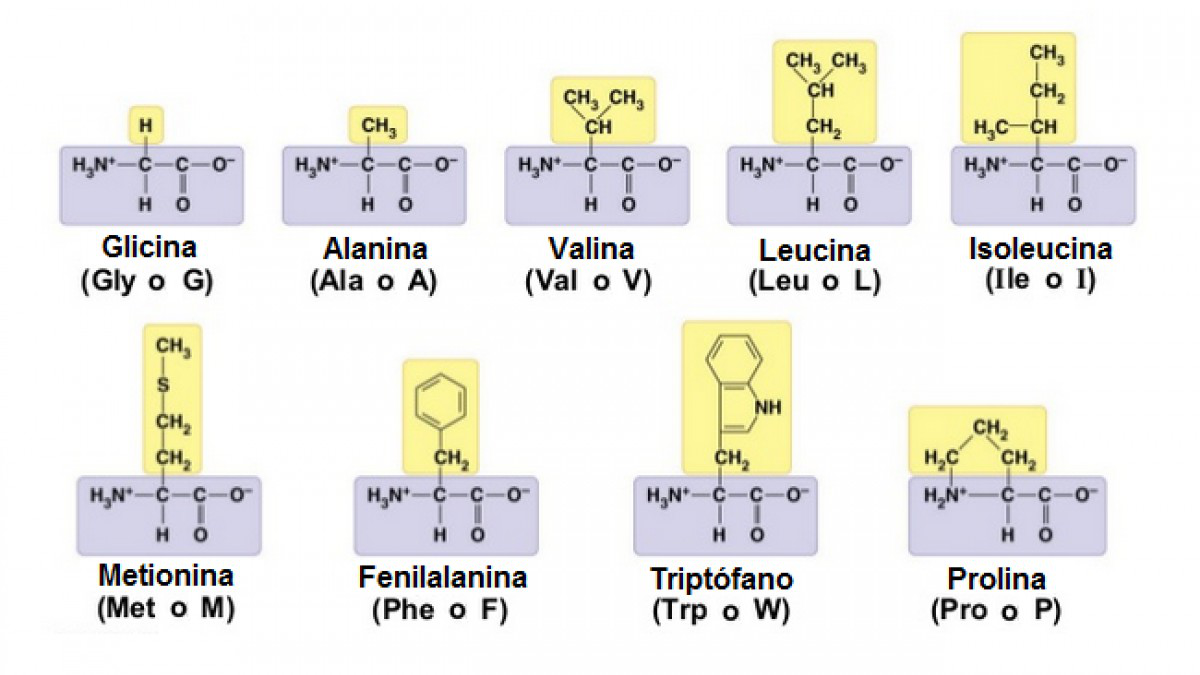

In [ ]:
img

AUTOR :JUAN CUEVAS VASQUEZ